In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Raw data access

import os
os.chdir('/content/drive/MyDrive/MPXV_pycaret/NEW_ML_MPXV')

#### **Importing the modules** ####

In [ ]:
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
ls


#### **Load Dataset** ####

In [ ]:
MPXV_df = pd.read_csv("13_K_C_ex_run.csv", index_col=0)


In [ ]:
display(MPXV_df.head(24))


#### **Data Preprocessing** ####
##### **Checking null entries** #####

In [ ]:
MPXV_df.info()

#### **Splitting the dataframes into train and test** ####

In [ ]:
!pip install pycaret

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(MPXV_df, target = 'condition', train_size = 0.8, session_id = 123)
# setup(X_iq, target = 'total_cases', train_size = 0.8, session_id = 123)

In [ ]:
import pycaret
print(pycaret.__version__)


3.3.2


## **Compare Models** ##

In [ ]:
# compare baseline models
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9000,0.5000,0.3000,0.3000,0.3000,nan,0.3000,0.3950
et,Extra Trees Classifier,0.9000,0.5000,0.3000,0.3000,0.3000,nan,0.3000,0.1560
svm,SVM - Linear Kernel,0.8500,0.3000,0.3000,0.2500,0.2667,nan,0.2000,0.0670
ada,Ada Boost Classifier,0.8500,0.3500,0.3000,0.3000,0.3000,nan,0.2000,0.1800
qda,Quadratic Discriminant Analysis,0.8000,0.4000,0.5000,0.4500,0.4667,nan,0.4000,0.0600
gbc,Gradient Boosting Classifier,0.8000,0.3500,0.3000,0.3000,0.3000,nan,0.2000,0.1810
lr,Logistic Regression,0.7500,0.5000,0.3000,0.2500,0.2667,nan,0.2000,1.4010
knn,K Neighbors Classifier,0.7500,0.4000,0.0000,0.0000,0.0000,nan,0.0000,0.1020
xgboost,Extreme Gradient Boosting,0.7500,0.3000,0.3000,0.2500,0.2667,nan,0.2000,0.0590
lightgbm,Light Gradient Boosting Machine,0.7500,0.2500,0.0000,0.0000,0.0000,nan,0.0000,0.1400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


## **Create Model**##

In [ ]:
# create model
rf = create_model('rf')

In [ ]:
# print model parameters
print(rf)

## **Tune Model** ##

In [ ]:
# tune hyperparameters of et
tuned_rf = tune_model(rf)

In [ ]:
# print tuned model
print(tuned_rf)

In [ ]:
tuned_rf

In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_rf, tuner = tune_model(rf, return_tuner=True)

In [ ]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['AURKA',
                                                                          'CDC20',
                                                                          'CCNB1',
                                                                          'KIF11',
                                                                          'HSPG2',
                                                                          'CCNA2',
                                                                          'BUB1B',
                                                                          'CCNB2',
                                                                          'BUB1',
                                                                          'RRM2',
                                                                          'CTBP2',
                                                                          'UBE2C',
                                                                          'TXNRD1'],
                                                                 transformer=SimpleImputer(add_...
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           160,
                                                                           170,
                                                                           180,
                                                                           190,
                                                                           200,
                                                                   

## **Analyze Model** ##

In [ ]:
#plot_model(rf, plot = 'residuals')

In [ ]:
# predicting error plot
plot_model(rf, plot = 'error')

In [ ]:
# cooks distance plot
#plot_model(rf, plot = 'cooks')

In [ ]:
# recursive feature elemination
#plot_model(rf, plot = 'rfe')

In [ ]:
# learning curve
plot_model(rf, plot = 'learning')

In [ ]:
# validation curve
plot_model(rf, plot = 'vc')

In [ ]:
# manifold learning plot
#plot_model(rf, plot = 'manifold')

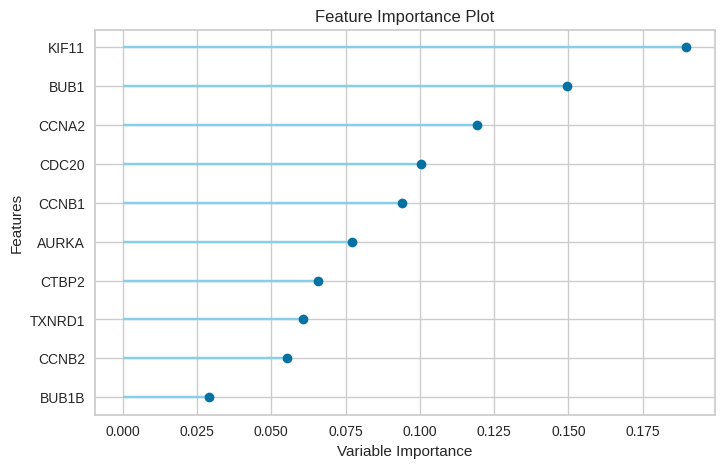

'Feature Importance.png'

In [ ]:
# plot feature importance
plot_model(rf, plot = 'feature')
# plot feature importance
plot_model(rf, plot = 'feature', save=True)